# Report: 🌍 Impact of Renewable Energy on CO2 Emission Intensity 🌱
## Contents:
1. Introduction
2. Methods
3. Results
4. Conclusion

# 1. 🚀 Introduction
The escalating concerns about climate change have driven efforts to explore sustainable energy alternatives. This project aims to investigate the relationship between the percentage of renewable energy use and CO2 emissions in various countries. The primary question addressed is: What is the correlation between the adoption of renewable energy sources and CO2 emission intensity? Understanding this connection is crucial for formulating effective strategies to mitigate environmental impact while promoting sustainable energy practices.

# 2. 🛠️ Methods
### Data sources
#### Datasource1: CO2 Emission by countries Year wise (1750-2022)
- **Metadata URL:** [Kaggle CO2 Emission Dataset](https://www.kaggle.com/)
- **Data URL:** [CO2 Emission Dataset](https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022)
- **Data Type:** CSV

#### Datasource2: Renewable Energy Share
- **Metadata URL:** [Kaggle Renewable Energy Share Dataset](https://www.kaggle.com/)
- **Data URL:** [Renewable Energy Share Dataset](https://www.kaggle.com/datasets/amirhoseinmousavian/renewable-energy-share?select=share-electricity-renewables.csv)
- **Data Type:** CSV

# Installtion of the dependency
Before moving towards the further, we need to first install the required dependencies for our project.

In [36]:
%pip install geopandas
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scipy
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\yagnesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Data Pipeline and Cleaning/Transformation

The data processing pipeline involves the following steps:

1. **Extracting ZIP Files:**
   - The CO2 Emission dataset is initially in ZIP format. The `extract_zip` function is used to extract the contents, facilitating subsequent processing.

2. **Reading and Preprocessing:**
   - Both datasets are read into Pandas DataFrames for ease of manipulation.
   - The `read_and_preprocess` function handles missing values, replacing them with a specified fill value (default is 0). This step ensures a cleaner dataset for analysis.

3. **Saving to CSV and SQLite:**
   - Processed data is saved to both CSV and SQLite formats using the `save_to_csv_and_sql` function.
   - This step prepares the data for storage and facilitates easy retrieval for subsequent analysis.

4. **Kaggle API Integration:**
   - The Kaggle API is utilized to download datasets directly within the pipeline. Authentication is set up using Kaggle API credentials stored securely in GitHub Secrets.

## Problems Encountered

- **Kaggle Dataset Download:**
  - The Kaggle datasets are downloaded using the Kaggle API. However, connectivity issues or changes in dataset availability on Kaggle might lead to download failures. Ensuring the datasets are publicly accessible on Kaggle is crucial for the success of the pipeline.

- **Data Cleaning Challenges:**
  - Handling missing values and ensuring consistency between datasets can be challenging. The preprocessing steps aim to address these issues, but variations in data quality across countries may pose additional challenges.

## Next Steps

With the data pipeline established and datasets prepared, the next steps involve the analysis and interpretation of the results. The project is now ready to unveil insights into the impact of renewable energy on CO2 emission intensity.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the path to your Excel file
co2_emmision_df = '../data/CO2 emission by countries.csv'
share_ele_df = '../data/share-electricity-renewables.csv'
encoding_type = 'ISO-8859-1'

# Read the Excel file into a DataFrame
df1 = pd.read_csv(co2_emmision_df, encoding=encoding_type)
df2 = pd.read_csv(share_ele_df, encoding=encoding_type)

In [38]:
df1.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [39]:
df2.head()

,Entity,Code,Year,Renewables (% electricity)
0,ASEAN (Ember),NaN,2000,19.774855
1,ASEAN (Ember),NaN,2001,19.305622
2,ASEAN (Ember),NaN,2002,17.972187
3,ASEAN (Ember),NaN,2003,16.931679
4,ASEAN (Ember),NaN,2004,15.882376


In [40]:
df2= df2.rename(columns={'Renewables (% electricity)': 'Renewables'})

In [41]:
df2.head()

,Entity,Code,Year,Renewables
0,ASEAN (Ember),NaN,2000,19.774855
1,ASEAN (Ember),NaN,2001,19.305622
2,ASEAN (Ember),NaN,2002,17.972187
3,ASEAN (Ember),NaN,2003,16.931679
4,ASEAN (Ember),NaN,2004,15.882376


In [42]:
# Sort Renewable Energy dataset by country and year
df2_sorted = df2.sort_values(by=['Entity', 'Year'])
df2_sorted

,Entity,Code,Year,Renewables
0,ASEAN (Ember),NaN,2000,19.774855
1,ASEAN (Ember),NaN,2001,19.305622
2,ASEAN (Ember),NaN,2002,17.972187
3,ASEAN (Ember),NaN,2003,16.931679
4,ASEAN (Ember),NaN,2004,15.882376
...,...,...,...,...
6827,Zimbabwe,ZWE,2017,58.503407
6828,Zimbabwe,ZWE,2018,59.412407
6829,Zimbabwe,ZWE,2019,55.582527
6830,Zimbabwe,ZWE,2020,55.204216


In [43]:
increasing_renewables_entities = []
for entity in df2_sorted['Entity'].unique():
    entity_data = df2_sorted[df2_sorted['Entity'] == entity]

    # Check if there is at least one increase in renewables
    if any(entity_data['Renewables'].diff().fillna(0) > 0):
        increasing_renewables_entities.append(entity)

In [44]:
# Filter CO2 Emission dataset for these countries
filtered_df1 = df1[df1['Country'].isin(increasing_renewables_entities)]
filtered_df1

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²


In [108]:
# Merge data on 'Country' and 'Year'
merged_df = pd.merge(df1, df2, how='inner', left_on=['Country', 'Year'], right_on=['Entity', 'Year'])


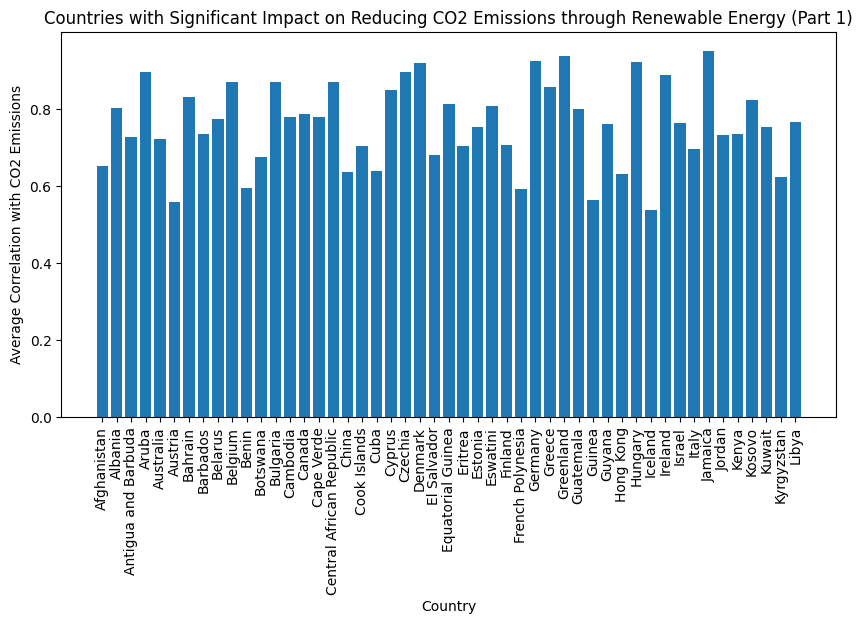

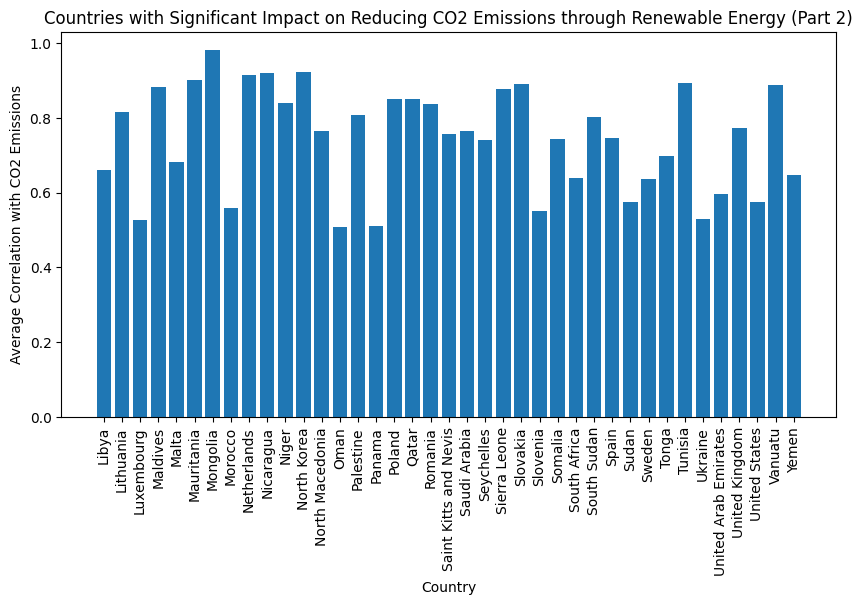

In [76]:
half_len = len(merged_df) // 2
first_half = merged_df.iloc[:half_len]
second_half = merged_df.iloc[half_len:]

# Function to perform correlation analysis and visualization
def visualize_correlation(data, title_suffix):
    grouped_by_region = data.groupby('Country')
    region_correlations = grouped_by_region[['Renewables', 'CO2 emission (Tons)']].corr().iloc[0::2, -1]
    threshold = 0.5
    avg_correlation_by_region = region_correlations.groupby('Country').mean()
    significant_regions = avg_correlation_by_region[avg_correlation_by_region > threshold]

    plt.figure(figsize=(10, 5))
    plt.bar(significant_regions.index, significant_regions)
    plt.xlabel('Country')
    plt.ylabel('Average Correlation with CO2 Emissions')
    plt.title(f'Countries with Significant Impact on Reducing CO2 Emissions through Renewable Energy ({title_suffix})')
    plt.xticks(rotation=90)
    plt.show()

# Visualize results for the first half
visualize_correlation(first_half, 'Part 1')

# Visualize results for the second half
visualize_correlation(second_half, 'Part 2')

# Correlation Calculation
Correlation coefficients are calculated for each country between the 'Renewables' and 'CO2 emission (Tons)' columns using the groupby and corr functions.

# Threshold Setting
A threshold value is set to categorize correlations as strong or weak. Currently set at 0.2, positive correlations indicate a positive relationship, while negative correlations indicate an inverse relationship.

# Positive Correlation Plots
### Strong Positive Correlation
Countries with a correlation coefficient greater than the threshold are plotted in dark green.

# Weak Positive Correlation
Countries with a correlation coefficient between 0 and the threshold are plotted in light green.

# Negative Correlation Plots
### Strong Negative Correlation
Countries with a correlation coefficient less than the negative of the threshold are plotted in dark red.

# Weak Negative Correlation
Countries with a correlation coefficient between 0 and the negative of the threshold are plotted in light coral.

# 3.📊 Results

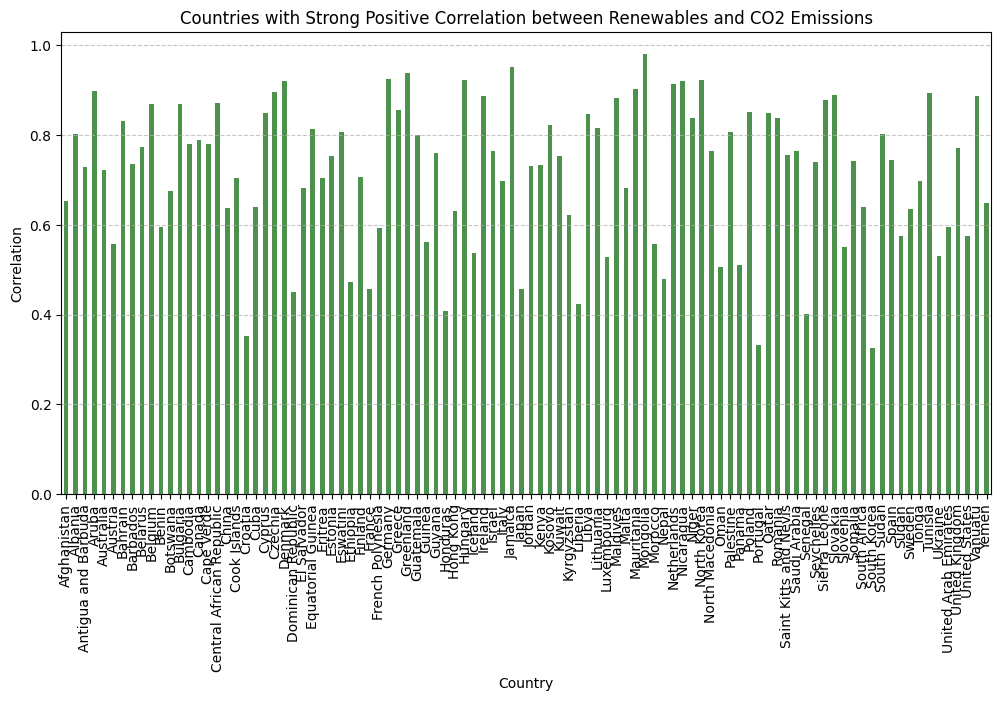

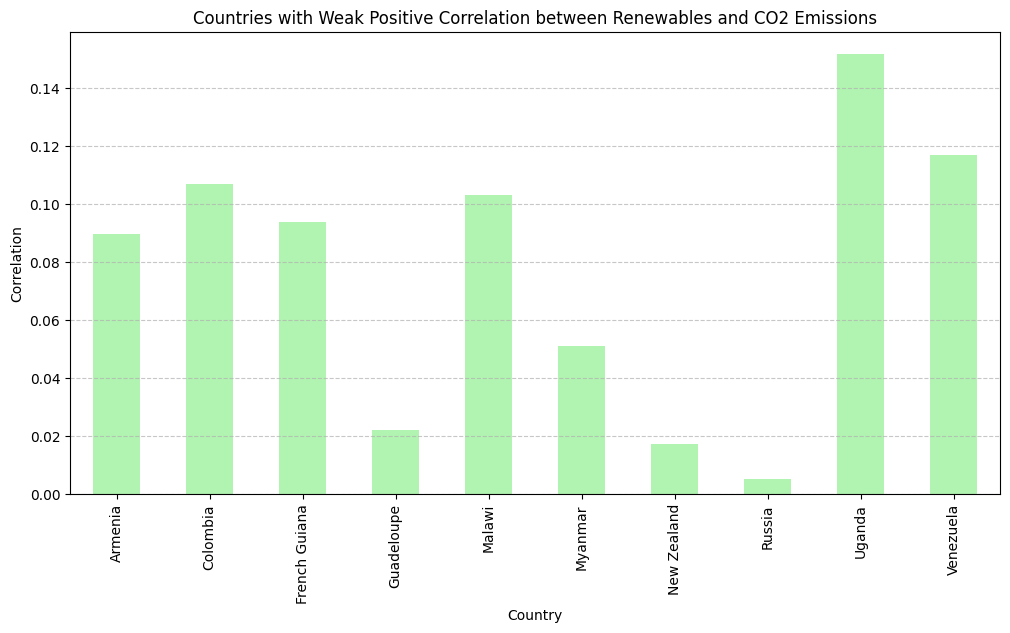

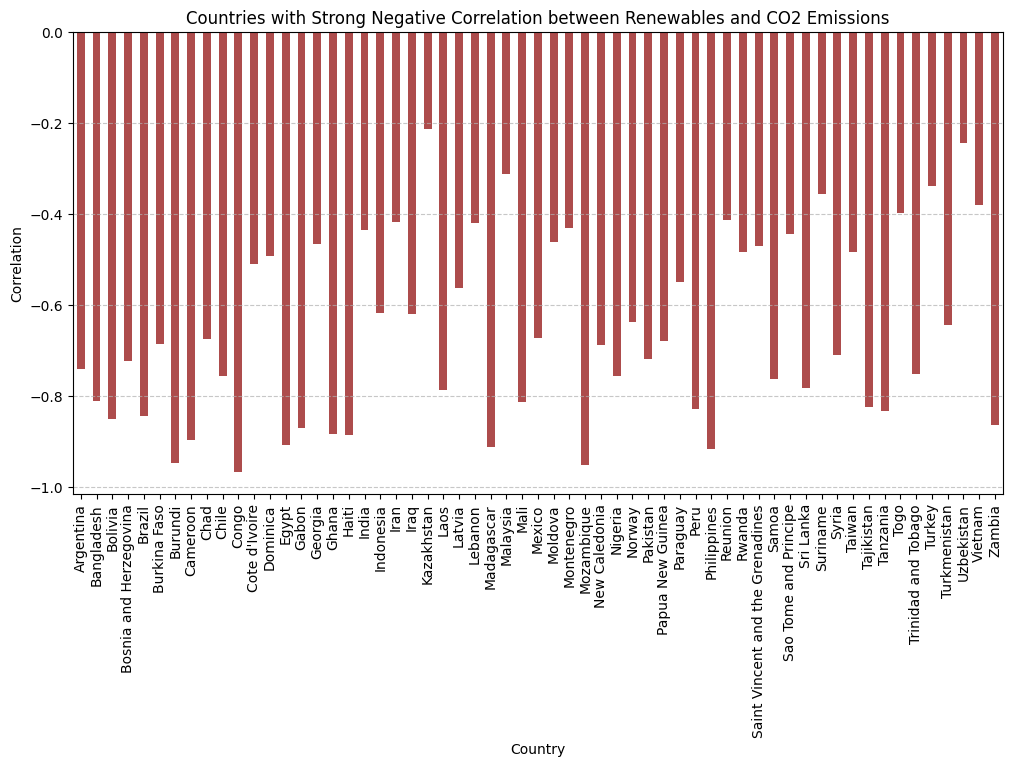

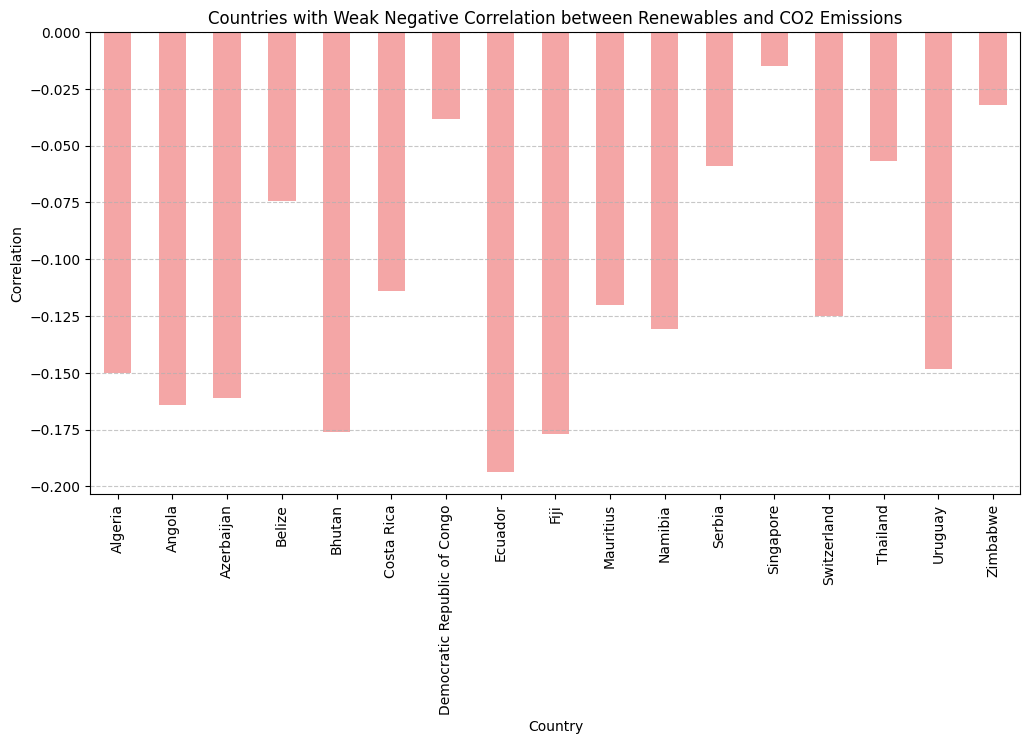

In [107]:
# Calculate correlation between Renewables and CO2 emissions
country_correlations = merged_df.groupby('Country')[['Renewables', 'CO2 emission (Tons)']].corr().iloc[0::2, -1]

# Set correlation threshold for weak correlation
threshold = 0.2

# Plot strong positive correlation countries
plt.figure(figsize=(12, 6))
strong_positive_correlation = country_correlations[country_correlations > threshold]
if not strong_positive_correlation.empty:
    strong_positive_correlation = strong_positive_correlation.droplevel(1)  # Drop 'Renewables' level
    strong_positive_correlation.plot(kind='bar', color='darkgreen', alpha=0.7)
    plt.title('Countries with Strong Positive Correlation between Renewables and CO2 Emissions')
    plt.xlabel('Country')
    plt.ylabel('Correlation')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print('No strong positive correlation countries to plot.')

# Plot weak positive correlation countries
plt.figure(figsize=(12, 6))
weak_positive_correlation = country_correlations[
    (country_correlations <= threshold) & (country_correlations > 0)
]
if not weak_positive_correlation.empty:
    weak_positive_correlation = weak_positive_correlation.droplevel(1)  # Drop 'Renewables' level
    weak_positive_correlation.plot(kind='bar', color='lightgreen', alpha=0.7)
    plt.title('Countries with Weak Positive Correlation between Renewables and CO2 Emissions')
    plt.xlabel('Country')
    plt.ylabel('Correlation')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print('No weak positive correlation countries to plot.')

# Plot strong negative correlation countries
plt.figure(figsize=(12, 6))
strong_negative_correlation = country_correlations[country_correlations < -threshold]
if not strong_negative_correlation.empty:
    strong_negative_correlation = strong_negative_correlation.droplevel(1)  # Drop 'Renewables' level
    strong_negative_correlation.plot(kind='bar', color='darkred', alpha=0.7)
    plt.title('Countries with Strong Negative Correlation between Renewables and CO2 Emissions')
    plt.xlabel('Country')
    plt.ylabel('Correlation')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print('No strong negative correlation countries to plot.')

# Plot weak negative correlation countries
plt.figure(figsize=(12, 6))
weak_negative_correlation = country_correlations[
    (country_correlations >= -threshold) & (country_correlations < 0)
]
if not weak_negative_correlation.empty:
    weak_negative_correlation = weak_negative_correlation.droplevel(1)  # Drop 'Renewables' level
    weak_negative_correlation.plot(kind='bar', color='lightcoral', alpha=0.7)
    plt.title('Countries with Weak Negative Correlation between Renewables and CO2 Emissions')
    plt.xlabel('Country')
    plt.ylabel('Correlation')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print('No weak negative correlation countries to plot.')


# 4.💬Conclusion

# Analysis of Correlation between Renewable Energy and CO2 Emissions

## Positive Correlation:

In the context of this analysis, positive correlation refers to a statistical relationship between two variables, in this case, between renewable energy consumption and CO2 emissions. A positive correlation means that as one variable increases, the other variable tends to increase as well. In simpler terms:

- **Renewables and CO2 Emissions Increase Together:** Countries with a positive correlation between renewable energy consumption and CO2 emissions are likely to experience higher CO2 emissions when their use of renewable energy increases.

## Negative Correlation:

Conversely, negative correlation refers to a statistical relationship where one variable tends to decrease as the other variable increases. In the analysis:

- **Renewables and CO2 Emissions Decrease Together:** Countries with a negative correlation between renewable energy consumption and CO2 emissions are expected to have lower CO2 emissions when their use of renewable energy increases.

## Correlation Coefficient:

The correlation coefficient quantifies the strength and direction of the linear relationship between two variables. It ranges from -1 to 1:

- A correlation coefficient of 1 indicates a perfect positive correlation.
- A correlation coefficient of -1 indicates a perfect negative correlation.
- A correlation coefficient of 0 indicates no correlation.

## Threshold:

The threshold set in the analysis (e.g., 0.2) helps categorize the strength of the correlation. If the correlation coefficient is greater than the threshold, it's considered a strong correlation; otherwise, it's considered a weak correlation.

## Analysis Purpose:

By analyzing positive and negative correlations, we gain insights into how changes in renewable energy consumption may impact CO2 emissions for different countries. Positive correlations might suggest that renewable energy adoption alone may not be sufficient to reduce emissions, while negative correlations may indicate that increasing renewable energy usage is associated with lower emissions.

### 🔍 Outlook to Future Work

## Insights from the Analysis:

1. **Policy Implications:**
   - *Positive Correlation:* Countries experiencing a positive correlation may need additional policies or strategies to ensure that increasing renewable energy adoption translates into actual emissions reduction.
   - *Negative Correlation:* Countries with negative correlation can consider emphasizing and expanding their renewable energy initiatives as a means to effectively reduce CO2 emissions.

2. **Identifying Outliers:**
   - Investigate countries that deviate from the overall trend. These outliers may provide valuable insights into unique factors influencing the relationship between renewable energy and CO2 emissions.

3. **Sector-Specific Analysis:**
   - Explore whether the correlation varies across different sectors. For instance, the transportation sector may have a different correlation than the industrial sector.

## Future Work:

1. **Temporal Analysis:**
   - Examine how the correlation between renewables and CO2 emissions changes over time. This can help identify trends and assess the effectiveness of long-term sustainability efforts.

2. **Causal Relationships:**
   - Conduct a more in-depth analysis to understand the causal relationships between renewable energy consumption and CO2 emissions. This may involve considering additional variables and employing advanced statistical methods.

3. **Policy Effectiveness:**
   - Evaluate the effectiveness of existing renewable energy policies in different countries. Assess whether policy interventions have led to the desired reduction in CO2 emissions.

4. **Technological Innovations:**
   - Investigate the role of technological advancements in renewable energy in influencing the correlation. Analyze how innovations in renewable energy technologies impact emissions.